In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
imu = pd.read_csv('imu.csv')
mcp = pd.read_csv('mocap.csv')

In [3]:
mcp.head()

,Time (s),Flexion Angle MoCap (degrees)
0,3.000000,0.763813
1,3.006667,0.754916
2,3.013333,0.715625
3,3.020000,0.725010
4,3.026667,0.777499


In [4]:
imu.columns = ['time', 'imu']
mcp.columns = ['time', 'mocap']

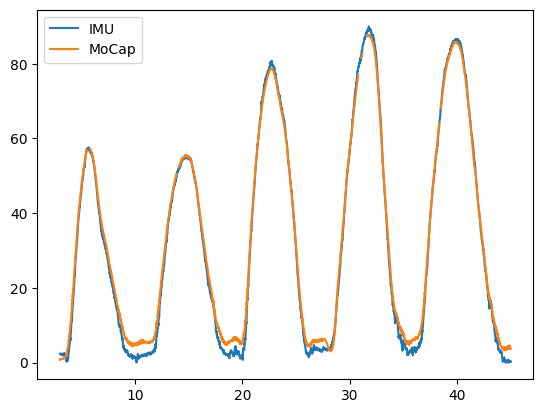

In [ ]:
plt.plot(imu.time, imu.imu, label='IMU')
plt.plot(mcp.time, mcp.mocap, label='MoCap')
plt.legend()

In [ ]:
def dtw_distance(ts1, ts2):
    n, m = len(ts1), len(ts2)
    D = cdist(ts1.reshape(-1, 1), ts2.reshape(-1, 1), metric='euclidean')

    cost = np.zeros((n + 1, m + 1))
    cost[0, 1:] = np.inf
    cost[1:, 0] = np.inf

    for i in range(n):
        for j in range(m):
            cost[i+1, j+1] = D[i, j] + min(cost[i, j+1], cost[i+1, j], cost[i, j])

    return cost[n, m]

In [7]:
time_grid = np.linspace(0, 0.9, 100)

interp_func_imu = interp1d(imu['time'], imu['imu'], kind='linear', fill_value='extrapolate')
interp_func_mcp = interp1d(mcp['time'], mcp['mocap'], kind='linear', fill_value='extrapolate')

imu_interp = interp_func_imu(time_grid)
mcp_interp = interp_func_mcp(time_grid) 

In [ ]:
observed = dtw_distance(imu_interp, mcp_interp)
print('Interpolated DTW distance:', observed)

Interpolated DTW distance: 990.0869888162839


In [ ]:
np.random.seed(566)
perm_dists = []

for _ in range(1000):
    permuted = np.random.permutation(imu_interp)
    dist = dtw_distance(permuted, mcp_interp)
    perm_dists.append(dist)

p_value = np.mean(np.array(perm_dists) <= observed)
print(f'P-value: {p_value:.4f}')

P-value: 0.5430
